# 1. Data Exploration

In [1]:
from collections import Counter, defaultdict

from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
STOCK_NEWS_DATASET_FILE = "../data/aapl_us_equities_news.csv"

TEXT_START = "\033[1m"
TEXT_END = "\033[0m"

## 1.1 Load data

In [3]:
%%time
df_aapl_us_equities_news = pd.read_csv(STOCK_NEWS_DATASET_FILE)

CPU times: user 4.07 s, sys: 280 ms, total: 4.35 s
Wall time: 4.35 s


## 1.2 Inspect data

**Inspect data types**

In [4]:
df_aapl_us_equities_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196859 entries, 0 to 196858
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         196859 non-null  int64  
 1   ticker     196859 non-null  object 
 2   title      196859 non-null  object 
 3   category   196859 non-null  object 
 4   content    196859 non-null  object 
 5   date       196859 non-null  object 
 6   provider   196859 non-null  object 
 7   url        196859 non-null  object 
 8   open       196859 non-null  float64
 9   high       196859 non-null  float64
 10  low        196859 non-null  float64
 11  close      196859 non-null  float64
 12  adj_close  196859 non-null  float64
 13  volume     196859 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 21.0+ MB


**Inspect missing rows**

In [5]:
percent_missing = df_aapl_us_equities_news.isnull().sum() * 100 / len(df_aapl_us_equities_news)

df_aapl_us_equities_news_missing_data = pd.DataFrame({"PERCENT_MISSING": percent_missing}, index=df_aapl_us_equities_news.columns)
df_aapl_us_equities_news_missing_data

,PERCENT_MISSING
id,0.0
ticker,0.0
title,0.0
category,0.0
content,0.0
date,0.0
provider,0.0
url,0.0
open,0.0
high,0.0


**Inspect basic statistics**

In [6]:
df_aapl_us_equities_news.describe(include="all")

,id,ticker,title,category,content,date,provider,url,open,high,low,close,adj_close,volume
count,196859.000000,196859,196859,196859,196859,196859,196859,196859,196859.000000,196859.000000,196859.000000,196859.000000,196859.000000,1.968590e+05
unique,NaN,801,191219,2,196392,2596,937,196859,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AAPL,Day Ahead Top 3 Things to Watch,opinion,EquitiesAsian market closed mixed on Wednesday...,2020-01-30,Zacks Investment Research,https://www.investing.com/news/forex-news/upda...,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,17648,201,107925,17,505,75685,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,332508.433635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.202984,40.570314,39.859594,40.236472,38.424216,1.725639e+08
std,64144.502129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.231390,15.379240,15.123163,15.277012,15.486214,1.448609e+08
min,221515.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.835357,2.928571,2.792857,2.792857,2.384630,4.544800e+07
25%,276698.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.417500,28.639999,28.157499,28.395000,26.281067,9.485880e+07
50%,332762.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.759998,41.130001,40.090000,40.757500,38.886185,1.262868e+08
75%,388253.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.697498,49.197498,48.285000,48.552502,47.317413,1.832496e+08


**Inspect first rows**

In [7]:
df_aapl_us_equities_news.head()

,id,ticker,title,category,content,date,provider,url,open,high,low,close,adj_close,volume
0,292541,BAC,UPDATE 4 Rouble at record low as Russia faces ...,news,Updates with day s interventions and futures ...,2009-01-15,Reuters,https://www.investing.com/news/forex-news/upda...,2.8775,3.004286,2.858929,2.977857,2.542589,1831634000
1,388968,BBY,UPDATE 4 DSG to cut more costs as sales fall w...,news,Xmas lfl sales down 10 percent gross margin...,2009-01-15,Reuters,https://www.investing.com/news/forex-news/upda...,2.8775,3.004286,2.858929,2.977857,2.542589,1831634000
2,342945,NYT,Lack of fame aids Geithner over US tax mistake,news,By Matthew Bigg\n ATLANTA Jan 15 Reuters ...,2009-01-15,Reuters,https://www.investing.com/news/forex-news/lack...,2.8775,3.004286,2.858929,2.977857,2.542589,1831634000
3,326167,TGT,CORRECTED Depression ahead prepare for stoc...,news,Corrects figure in paragraph 3 \n LONDON Jan...,2009-01-15,Reuters,https://www.investing.com/news/forex-news/corr...,2.8775,3.004286,2.858929,2.977857,2.542589,1831634000
4,326166,TGT,Euro area CPI Falls Down To 1 6 In December,news,Release Explanation The CPI measures the aver...,2009-01-15,LFB Forex,https://www.investing.com/news/forex-news/euro...,2.8775,3.004286,2.858929,2.977857,2.542589,1831634000


## 1.3 Subset data

In [8]:
df_aapl_us_equities_news_subset = df_aapl_us_equities_news[df_aapl_us_equities_news["ticker"] == "AAPL"]

**Inspect data types**

In [9]:
df_aapl_us_equities_news_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17648 entries, 8491 to 194139
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         17648 non-null  int64  
 1   ticker     17648 non-null  object 
 2   title      17648 non-null  object 
 3   category   17648 non-null  object 
 4   content    17648 non-null  object 
 5   date       17648 non-null  object 
 6   provider   17648 non-null  object 
 7   url        17648 non-null  object 
 8   open       17648 non-null  float64
 9   high       17648 non-null  float64
 10  low        17648 non-null  float64
 11  close      17648 non-null  float64
 12  adj_close  17648 non-null  float64
 13  volume     17648 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 2.0+ MB


**Inspect basic statistics**

In [10]:
df_aapl_us_equities_news_subset.describe(include="all")

,id,ticker,title,category,content,date,provider,url,open,high,low,close,adj_close,volume
count,17648.000000,17648,17648,17648,17648,17648,17648,17648,17648.000000,17648.000000,17648.000000,17648.000000,17648.000000,1.764800e+04
unique,NaN,1,17512,2,17624,1740,416,17648,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AAPL,Top 5 things to watch today,opinion,For Immediate Release Chicago IL May 1 ...,2019-11-04,Zacks Investment Research,https://www.investing.com/analysis/waiting-for...,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,17648,13,11418,3,116,7711,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,280640.533602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.006476,41.395343,40.647709,41.040853,39.182491,1.607326e+08
std,5773.150898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.423158,12.537988,12.354624,12.468126,12.736599,1.157865e+08
min,270698.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.856071,14.271429,13.753571,13.947500,12.084599,4.544800e+07
25%,275622.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.215000,32.544998,32.035000,32.192501,29.274046,9.648600e+07
50%,280547.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.215000,40.930000,39.972500,40.367500,38.311382,1.263232e+08
75%,285493.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.507500,47.992500,46.965000,47.560001,45.813007,1.804025e+08


**Inspect first rows**

In [11]:
df_aapl_us_equities_news_subset.head()

,id,ticker,title,category,content,date,provider,url,open,high,low,close,adj_close,volume
8491,290924,AAPL,Waiting For Direction On The Markets,opinion,This stock market has been a difficult one for...,2012-07-16,Cam Hui,https://www.investing.com/analysis/waiting-for...,21.611429,21.843571,21.607857,21.675358,18.507113,301260400
8546,290925,AAPL,Mid Year Update U S And Canadian Stock Marke...,opinion,From 2004 to 2010 the TSX 300 Index of leading...,2012-07-19,Baskin Financial Blog,https://www.investing.com/analysis/mid-year-up...,21.831429,21.976786,21.642857,21.940001,18.733074,436861600
8591,290928,AAPL,Trade Apple After Earnings,opinion,It may look like a spider web but the mishmas...,2012-07-23,Abigail Doolittle,https://www.investing.com/analysis/trade-apple...,21.228571,21.639286,20.989643,21.565357,18.413191,487975600
8592,290927,AAPL,Apple Earnings Preview Quarterly Dip On Deck,opinion,Last quarter Apple AAPL reported the 2nd bes...,2012-07-23,David Dyer,https://www.investing.com/analysis/apple-earni...,21.228571,21.639286,20.989643,21.565357,18.413191,487975600
8593,290926,AAPL,Summer Heat Scorches Europe And U S,opinion,Europe flares as summer heat continues Summer...,2012-07-23,John Nyaradi,https://www.investing.com/analysis/summer-heat...,21.228571,21.639286,20.989643,21.565357,18.413191,487975600


## 1.4 Plot data

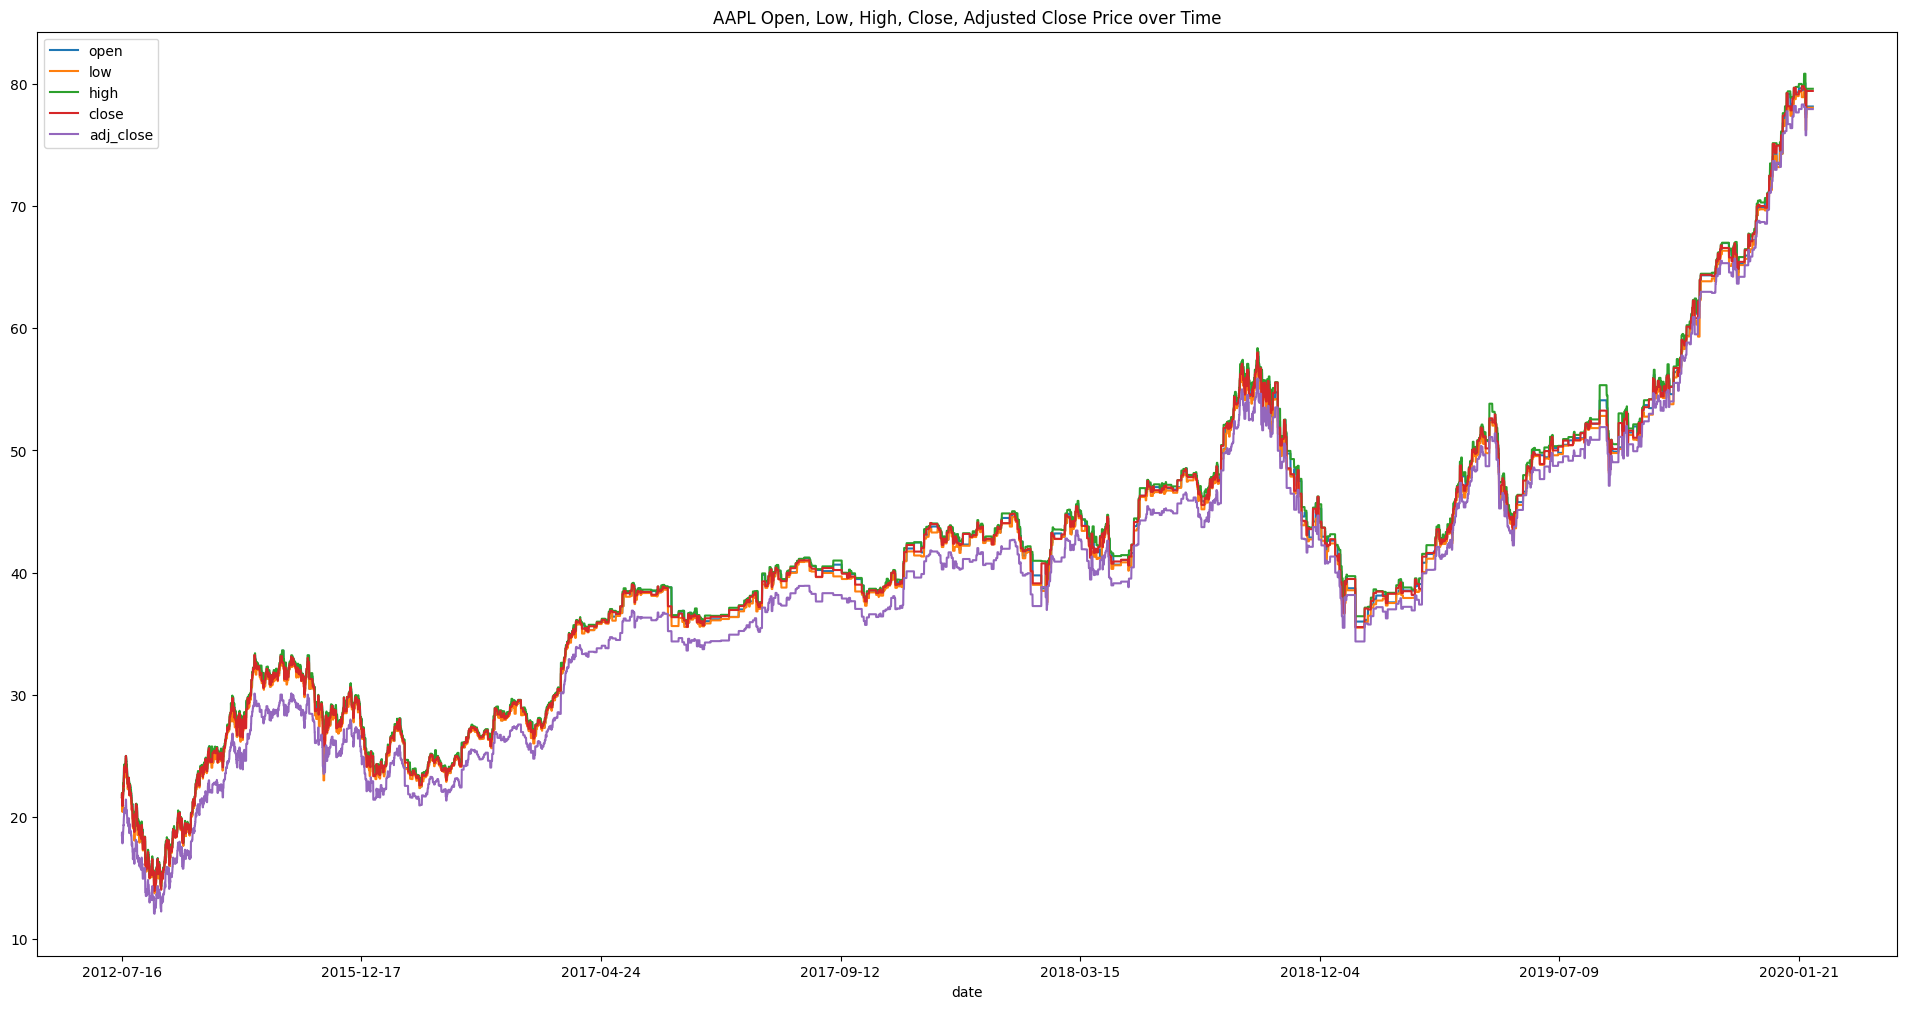

In [12]:
_ = df_aapl_us_equities_news_subset.plot(
    x="date",
    y=["open","low","high","close", "adj_close"],
    kind="line",
    title="AAPL Open, Low, High, Close, Adjusted Close Price over Time",
    figsize=(24, 12),
)

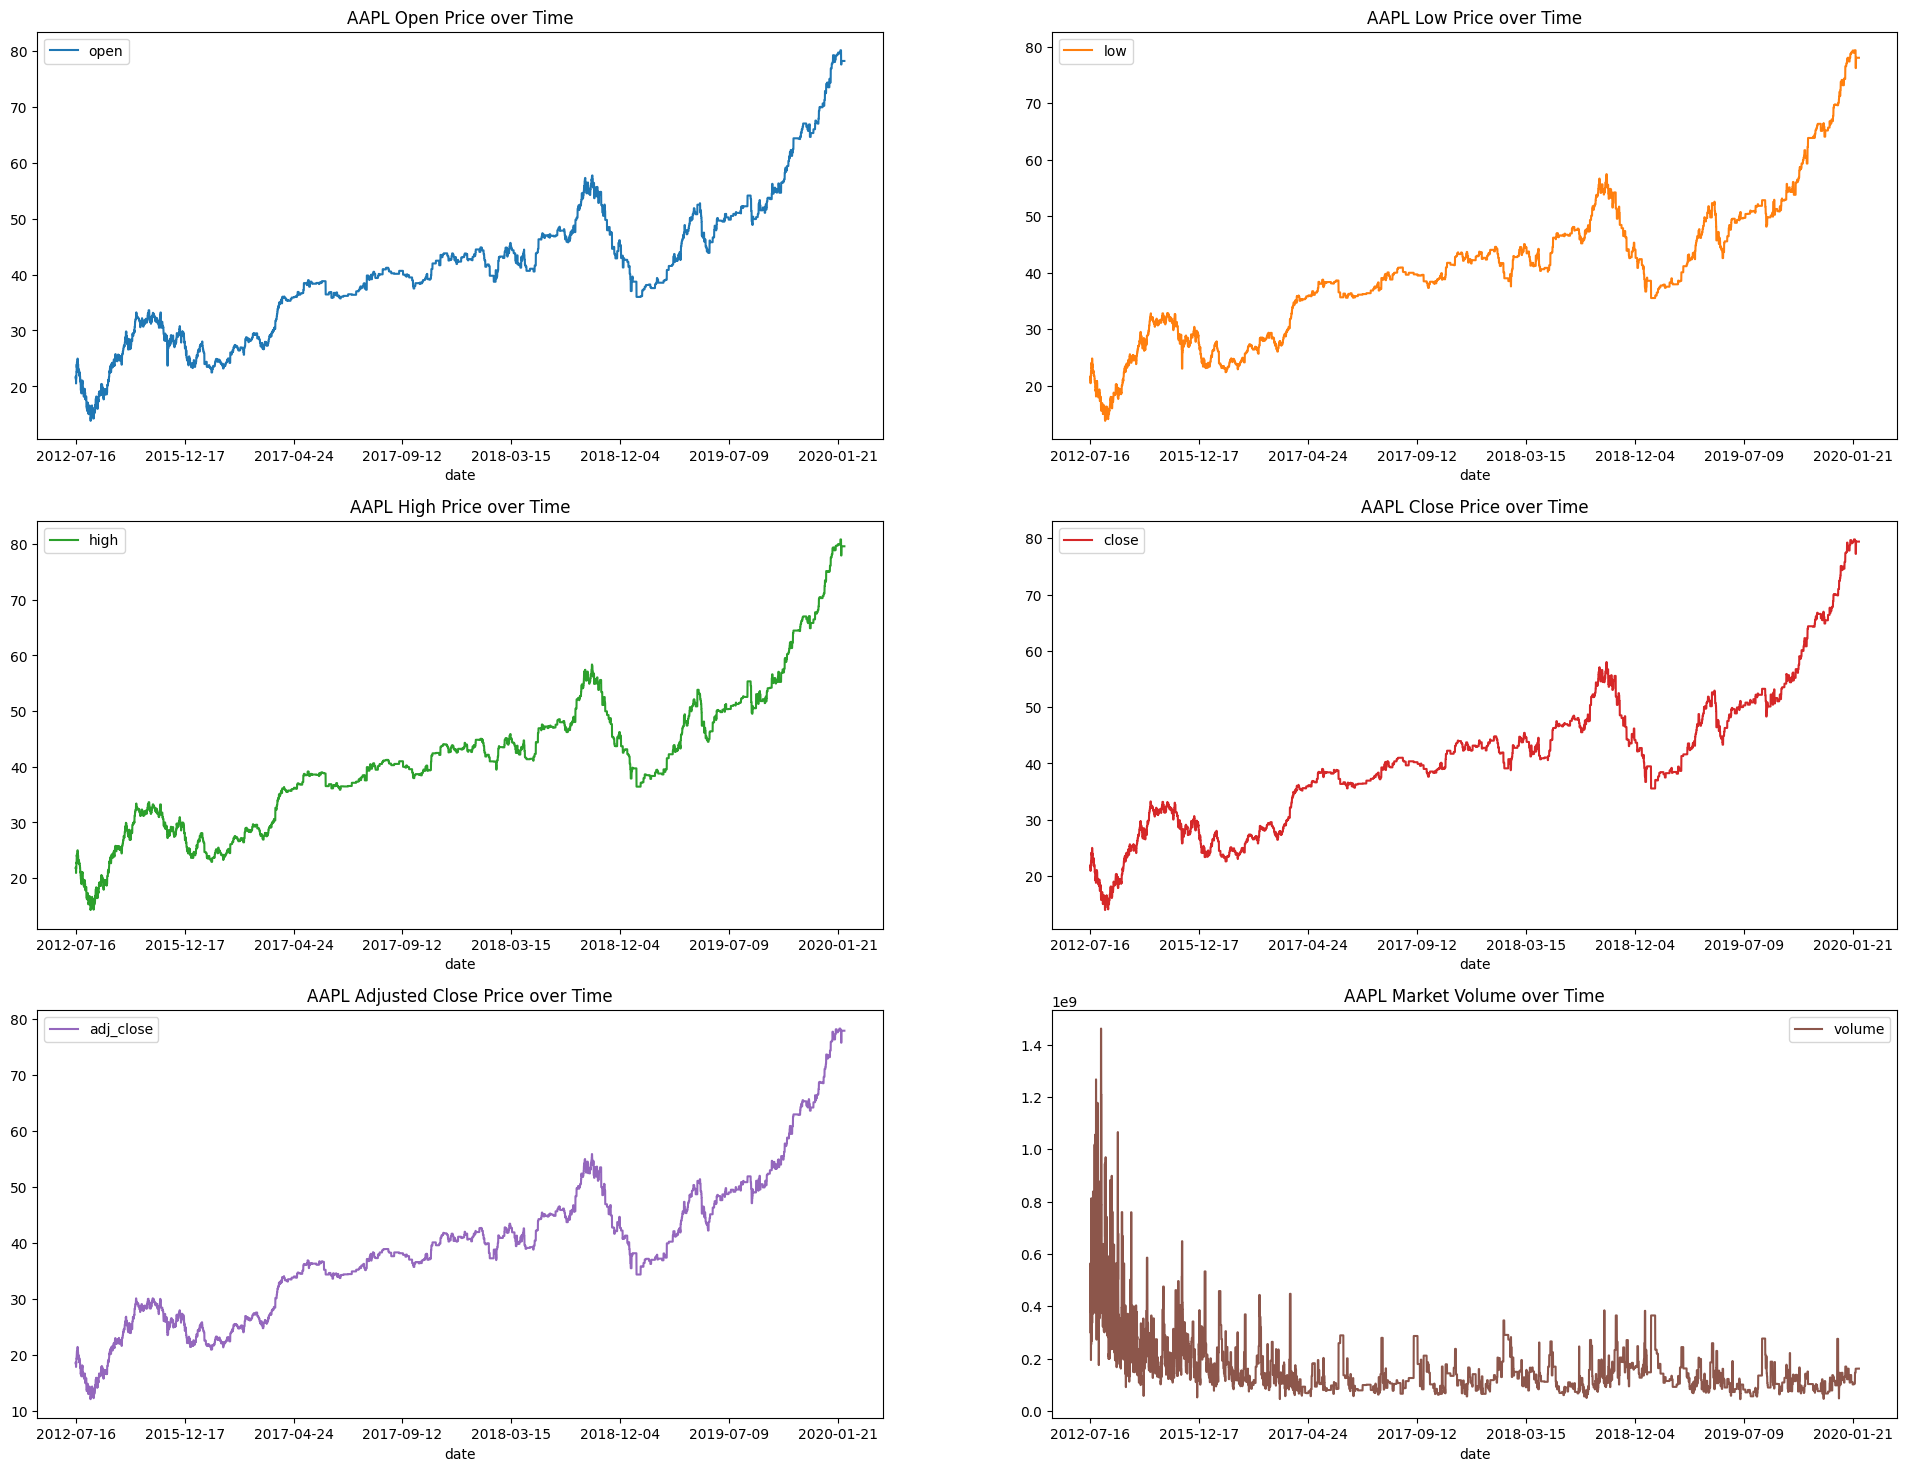

In [13]:
_ = df_aapl_us_equities_news_subset.plot(
    x="date",
    y=["open","low","high","close", "adj_close", "volume"],
    kind="line",
    title=[
        "AAPL Open Price over Time",
        "AAPL Low Price over Time",
        "AAPL High Price over Time",
        "AAPL Close Price over Time",
        "AAPL Adjusted Close Price over Time",
        "AAPL Market Volume over Time",
    ],
    figsize=(24, 18),
    layout=(3, 2),
    subplots=True,
    sharex=False,
)

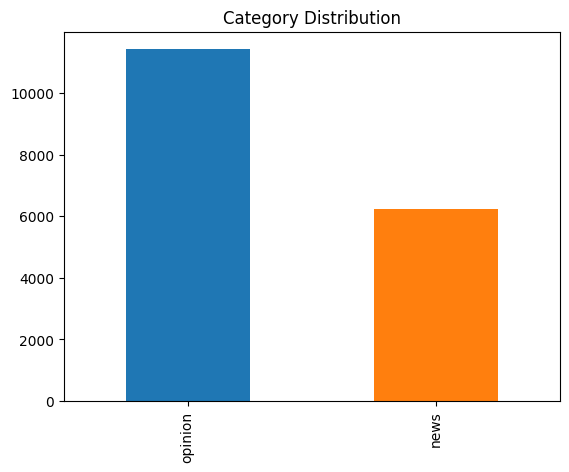

In [14]:
_ = df_aapl_us_equities_news_subset["category"].value_counts().plot(
    kind="bar",
    color=["tab:blue", "tab:orange"],
    title="Category Distribution"
)

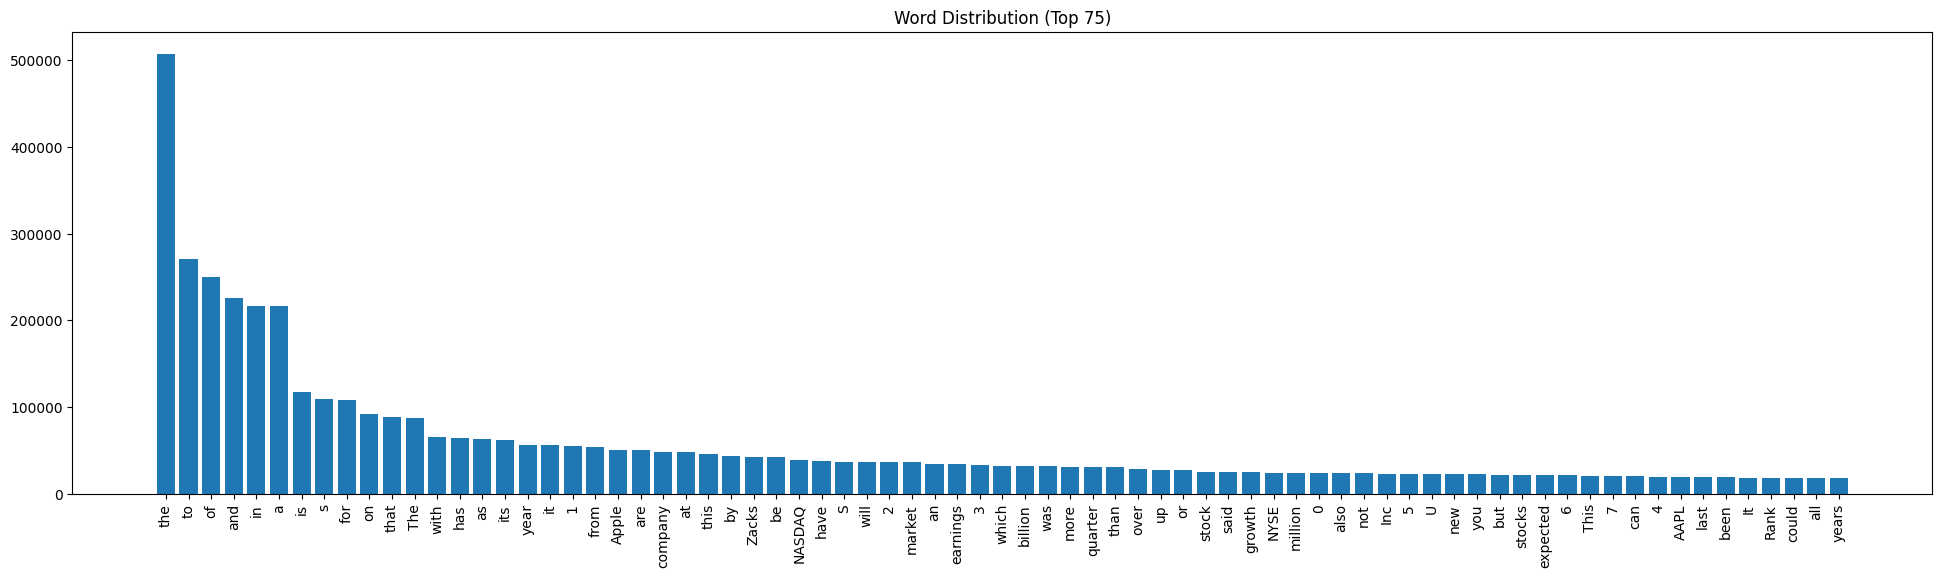

In [15]:
word_counter = Counter([word for word_list in df_aapl_us_equities_news_subset["content"].apply(word_tokenize) for word in word_list])

x, y = zip(*word_counter.most_common(75))

plt.figure(figsize=(24, 6))
plt.bar(x, y)
plt.title("Word Distribution (Top 75)")
plt.xticks(rotation=90)
plt.show()

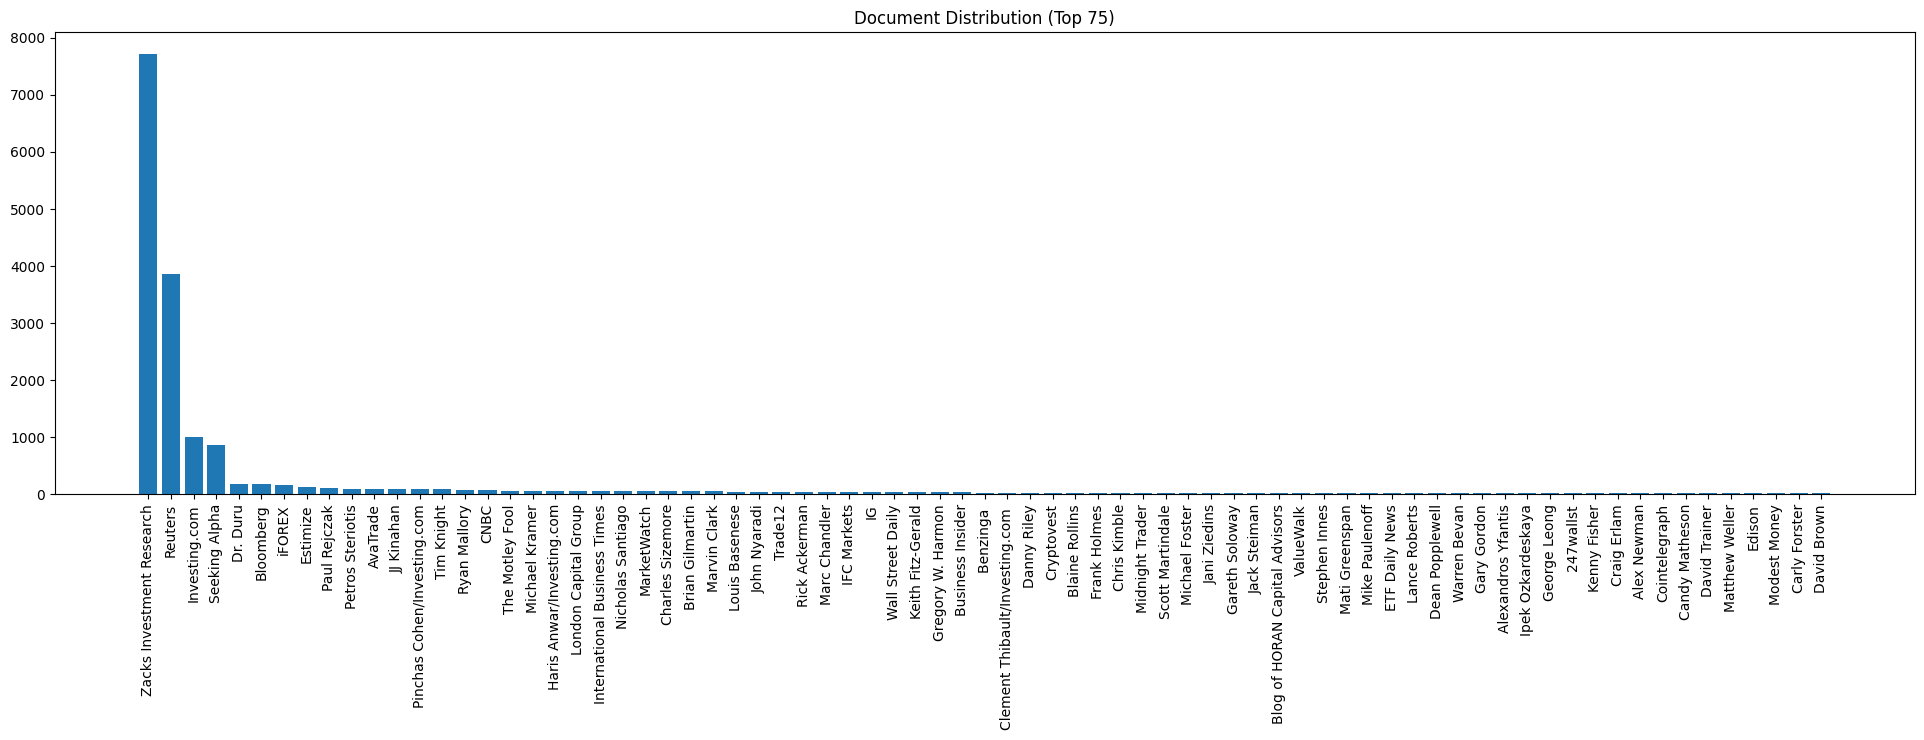

In [16]:
document_counter = Counter(df_aapl_us_equities_news_subset["provider"].value_counts().to_dict())

x, y = zip(*document_counter.most_common(75))

plt.figure(figsize=(24, 6))
plt.bar(x, y)
plt.title("Document Distribution (Top 75)")
plt.xticks(rotation=90)
plt.show()

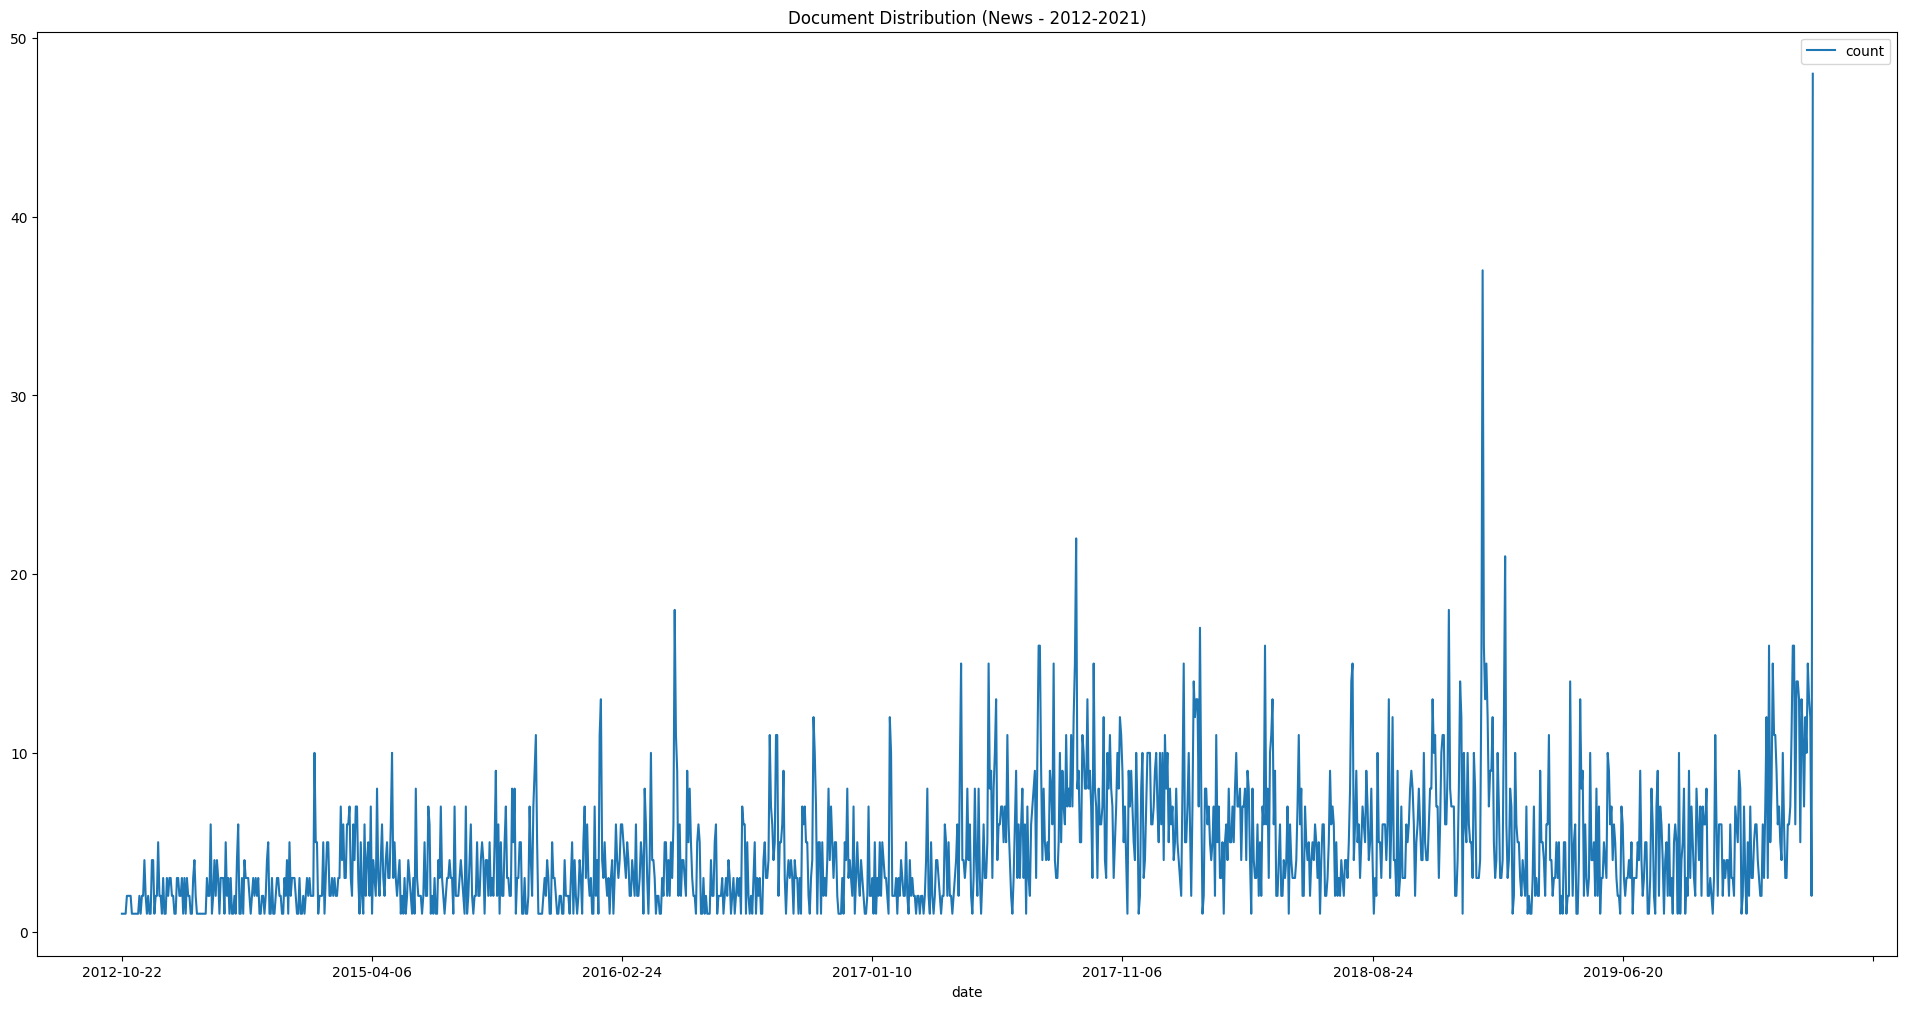

In [17]:
news_distribution = df_aapl_us_equities_news_subset[df_aapl_us_equities_news_subset["category"] == "news"].groupby("date").agg({"id": "count"}).rename(columns={"id": "count"})

_ = news_distribution.plot(
    kind="line",
    title="Document Distribution (News - 2012-2021)",
    figsize=(24, 12),
)

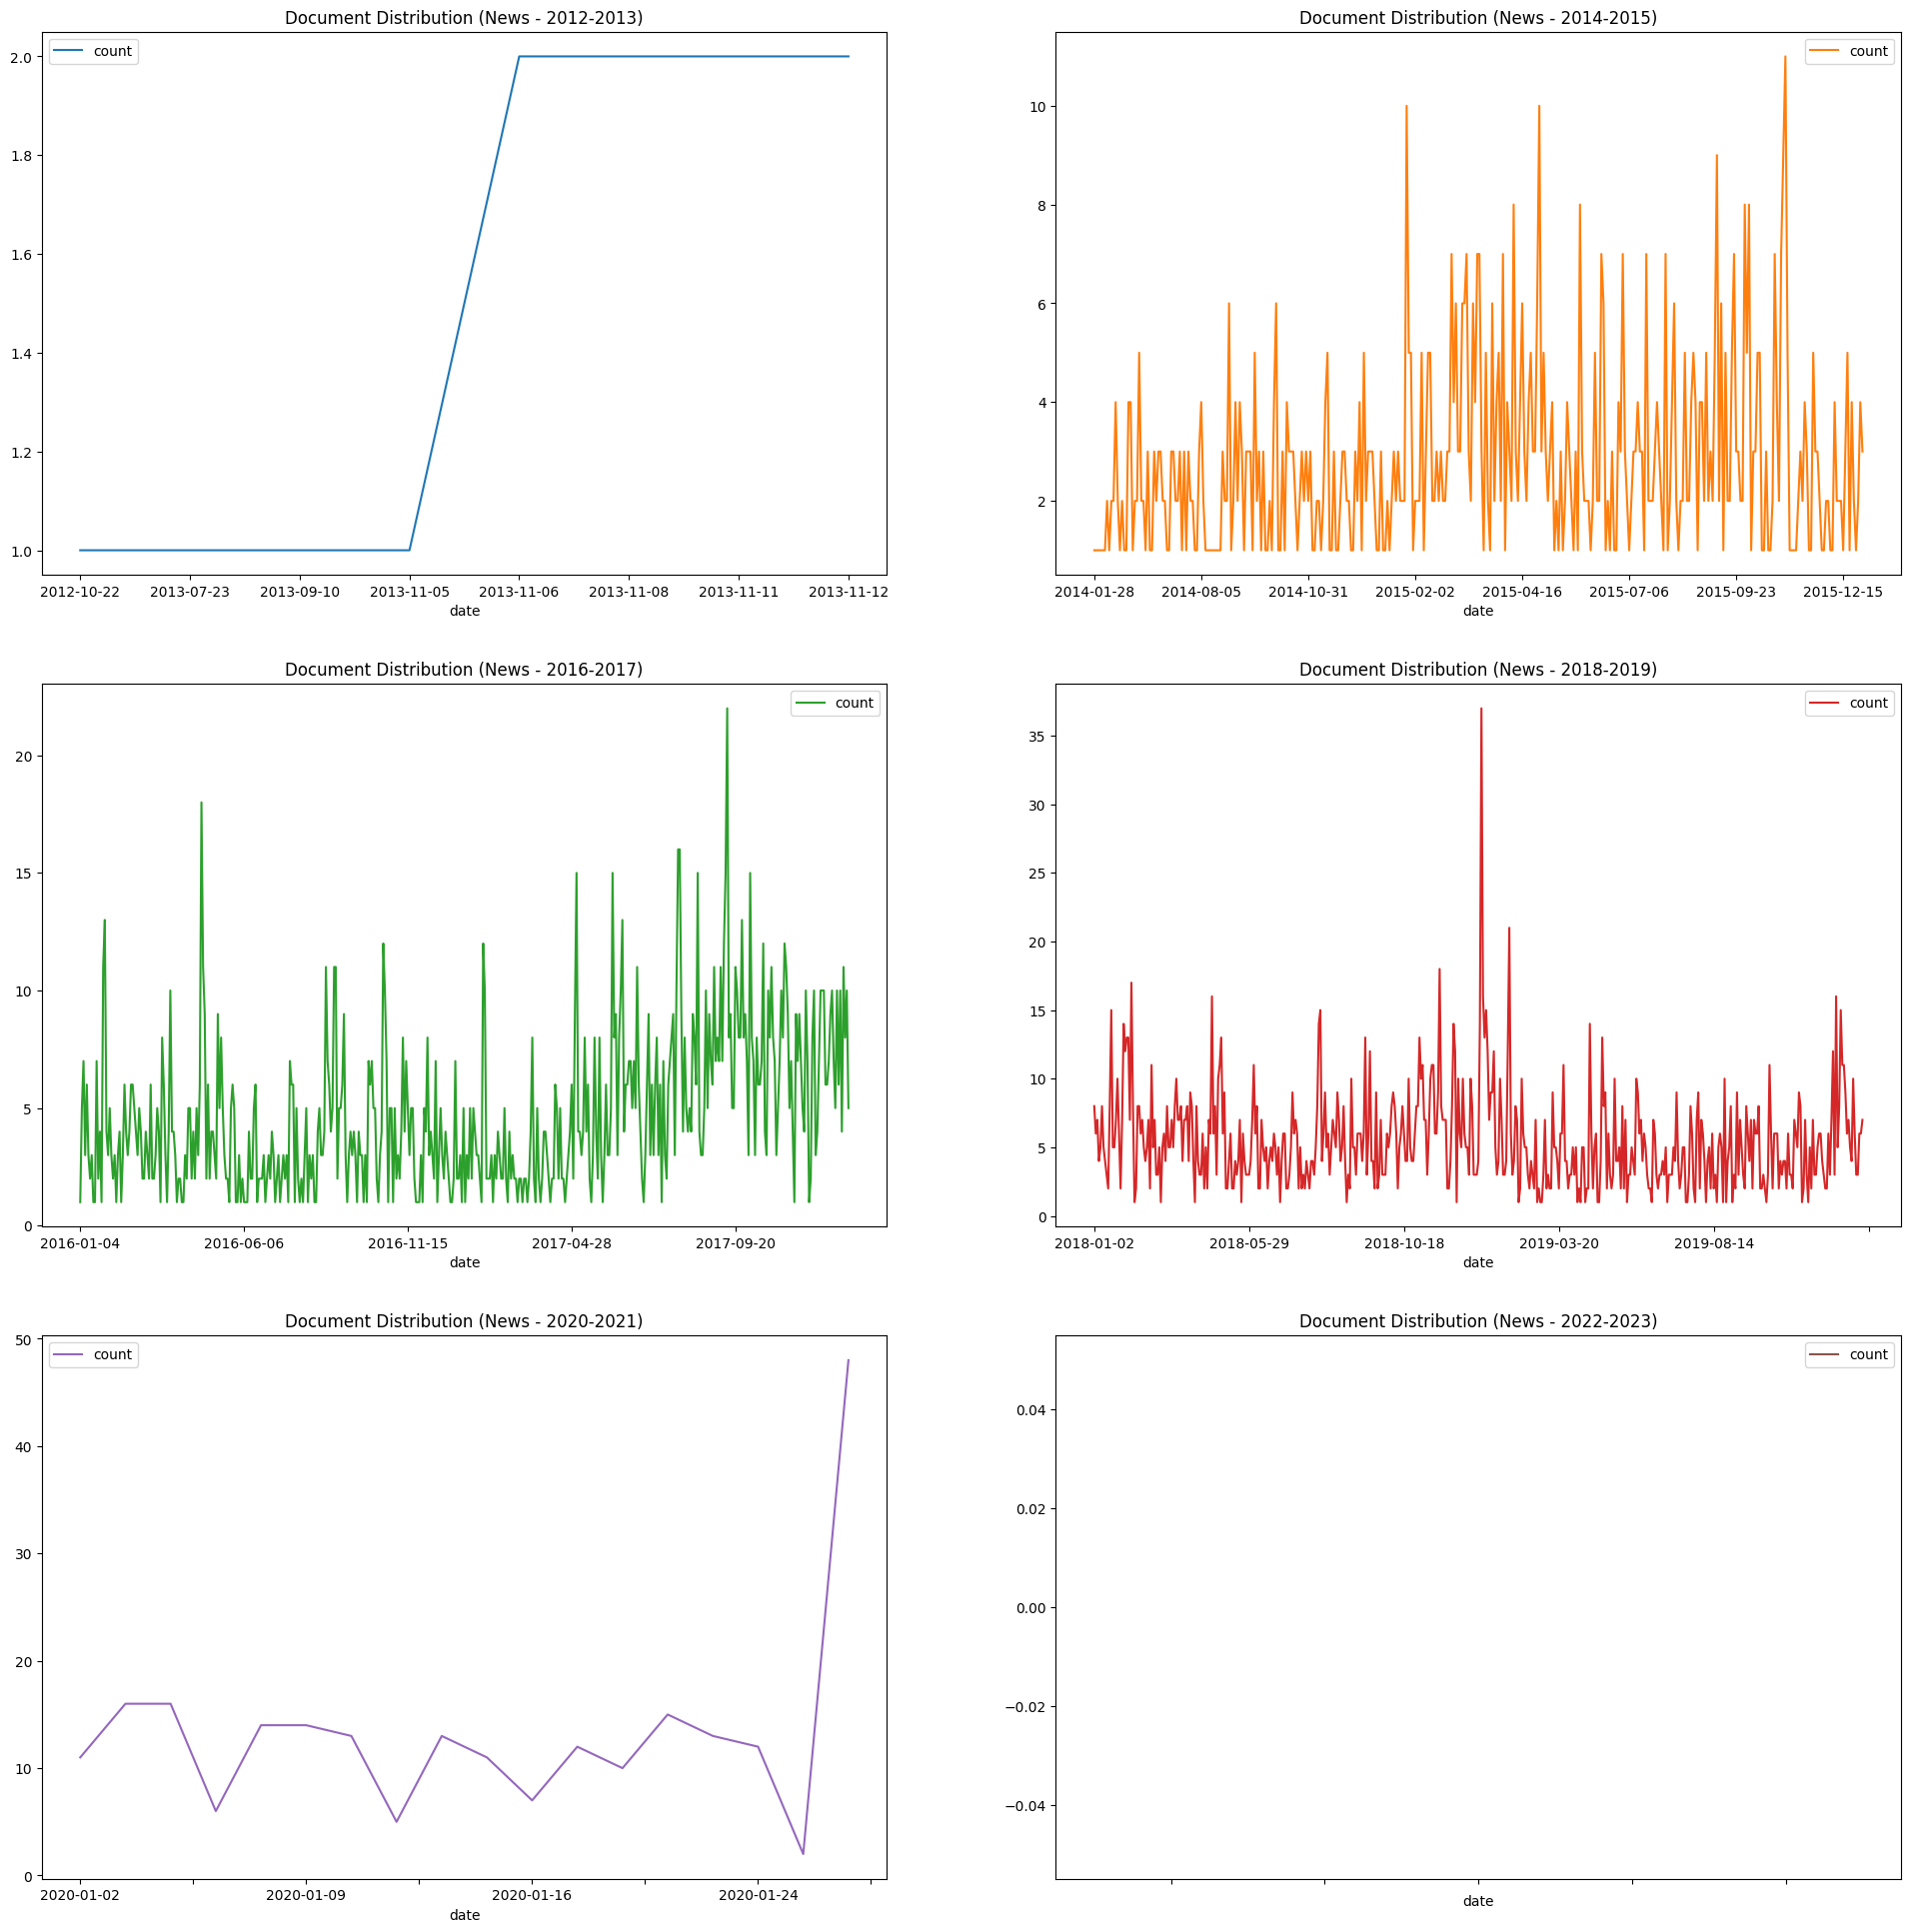

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 24))

_ = news_distribution[(news_distribution.index >= "2012-01-01") & (news_distribution.index <= "2013-12-31")].plot(
    kind="line",
    ax=axes[0, 0],
    color="tab:blue",
    title="Document Distribution (News - 2012-2013)",
)

_ = news_distribution[(news_distribution.index >= "2014-01-01") & (news_distribution.index <= "2015-12-31")].plot(
    kind="line",
    ax=axes[0, 1],
    color="tab:orange",
    title="Document Distribution (News - 2014-2015)",
)

_ = news_distribution[(news_distribution.index >= "2016-01-01") & (news_distribution.index <= "2017-12-31")].plot(
    kind="line",
    ax=axes[1, 0],
    color="tab:green",
    title="Document Distribution (News - 2016-2017)",
)

_ = news_distribution[(news_distribution.index >= "2018-01-01") & (news_distribution.index <= "2019-12-31")].plot(
    kind="line",
    ax=axes[1, 1],
    color="tab:red",
    title="Document Distribution (News - 2018-2019)",
)

_ = news_distribution[(news_distribution.index >= "2020-01-01") & (news_distribution.index <= "2021-12-31")].plot(
    kind="line",
    ax=axes[2, 0],
    color="tab:purple",
    title="Document Distribution (News - 2020-2021)",
)

_ = news_distribution[(news_distribution.index >= "2022-01-01") & (news_distribution.index <= "2023-12-31")].plot(
    kind="line",
    ax=axes[2, 1],
    color="tab:brown",
    title="Document Distribution (News - 2022-2023)",
)

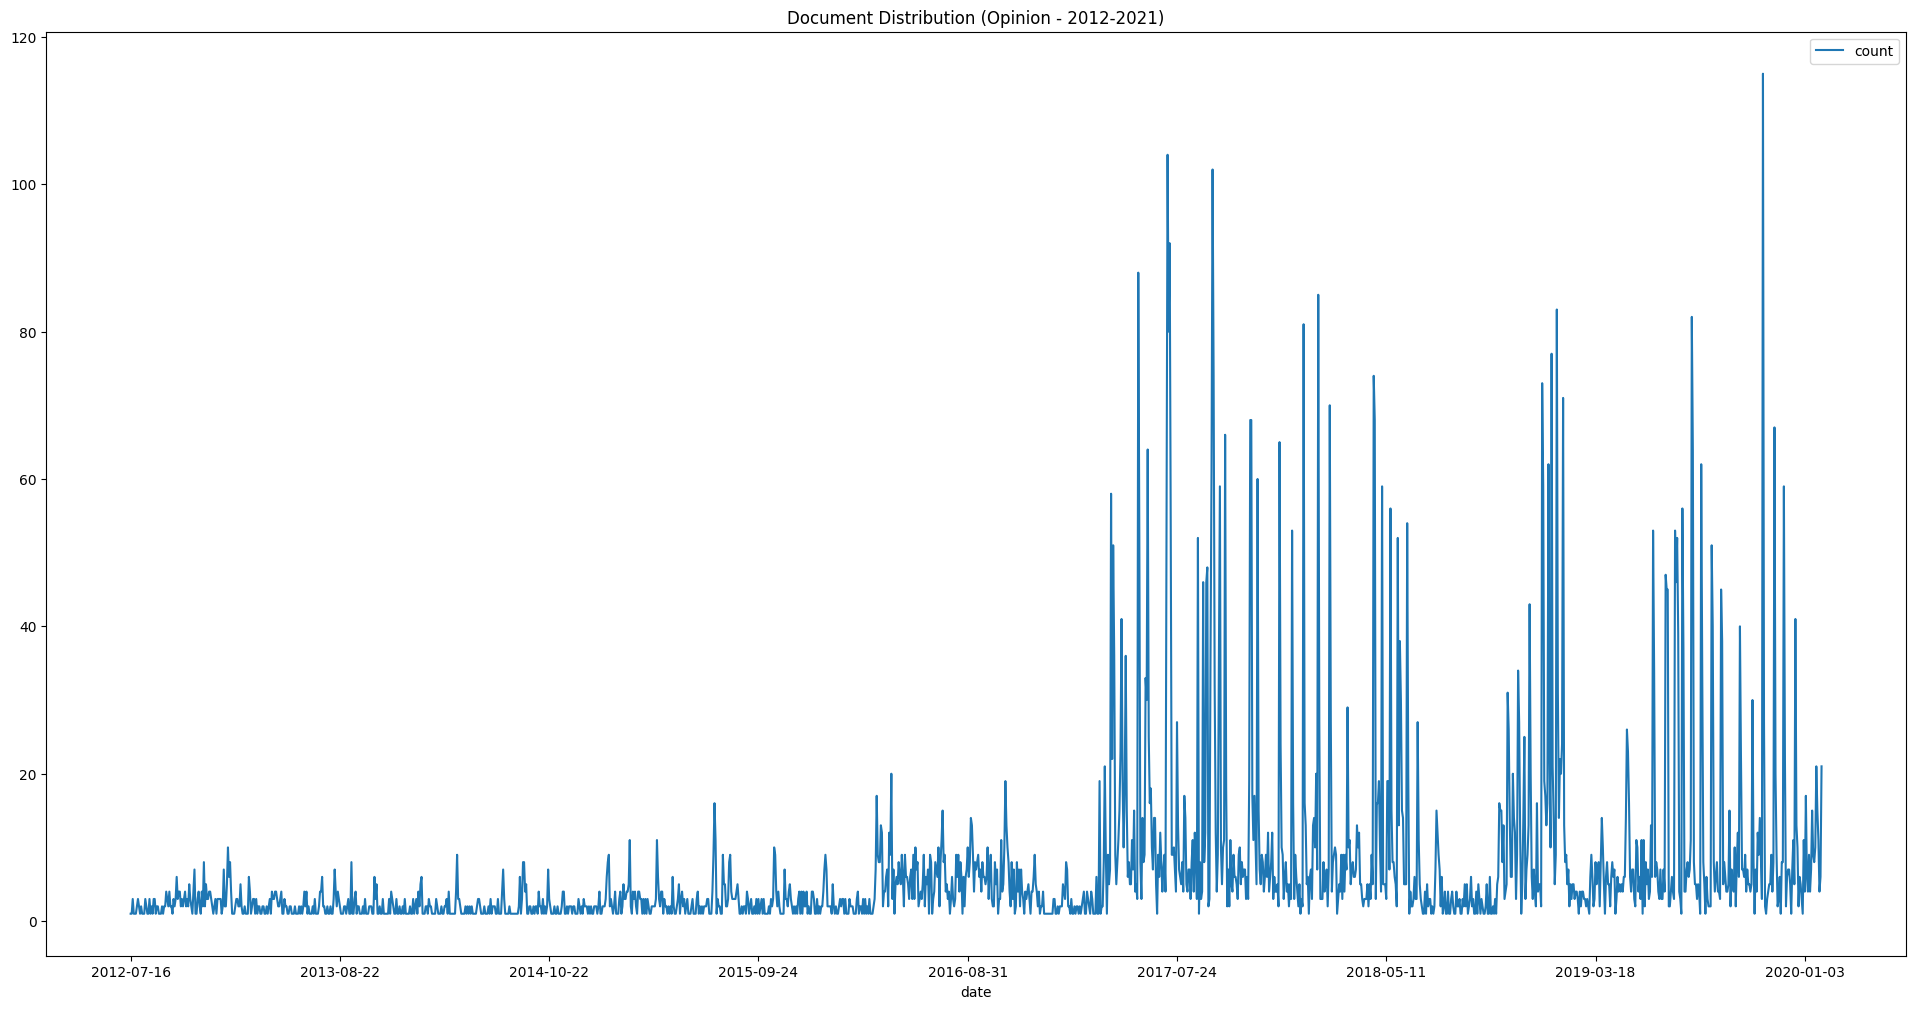

In [19]:
opinion_distribution = df_aapl_us_equities_news_subset[df_aapl_us_equities_news_subset["category"] == "opinion"].groupby("date").agg({"id": "count"}).rename(columns={"id": "count"})

_ = opinion_distribution.plot(
    kind="line",
    title="Document Distribution (Opinion - 2012-2021)",
    figsize=(24, 12),
)

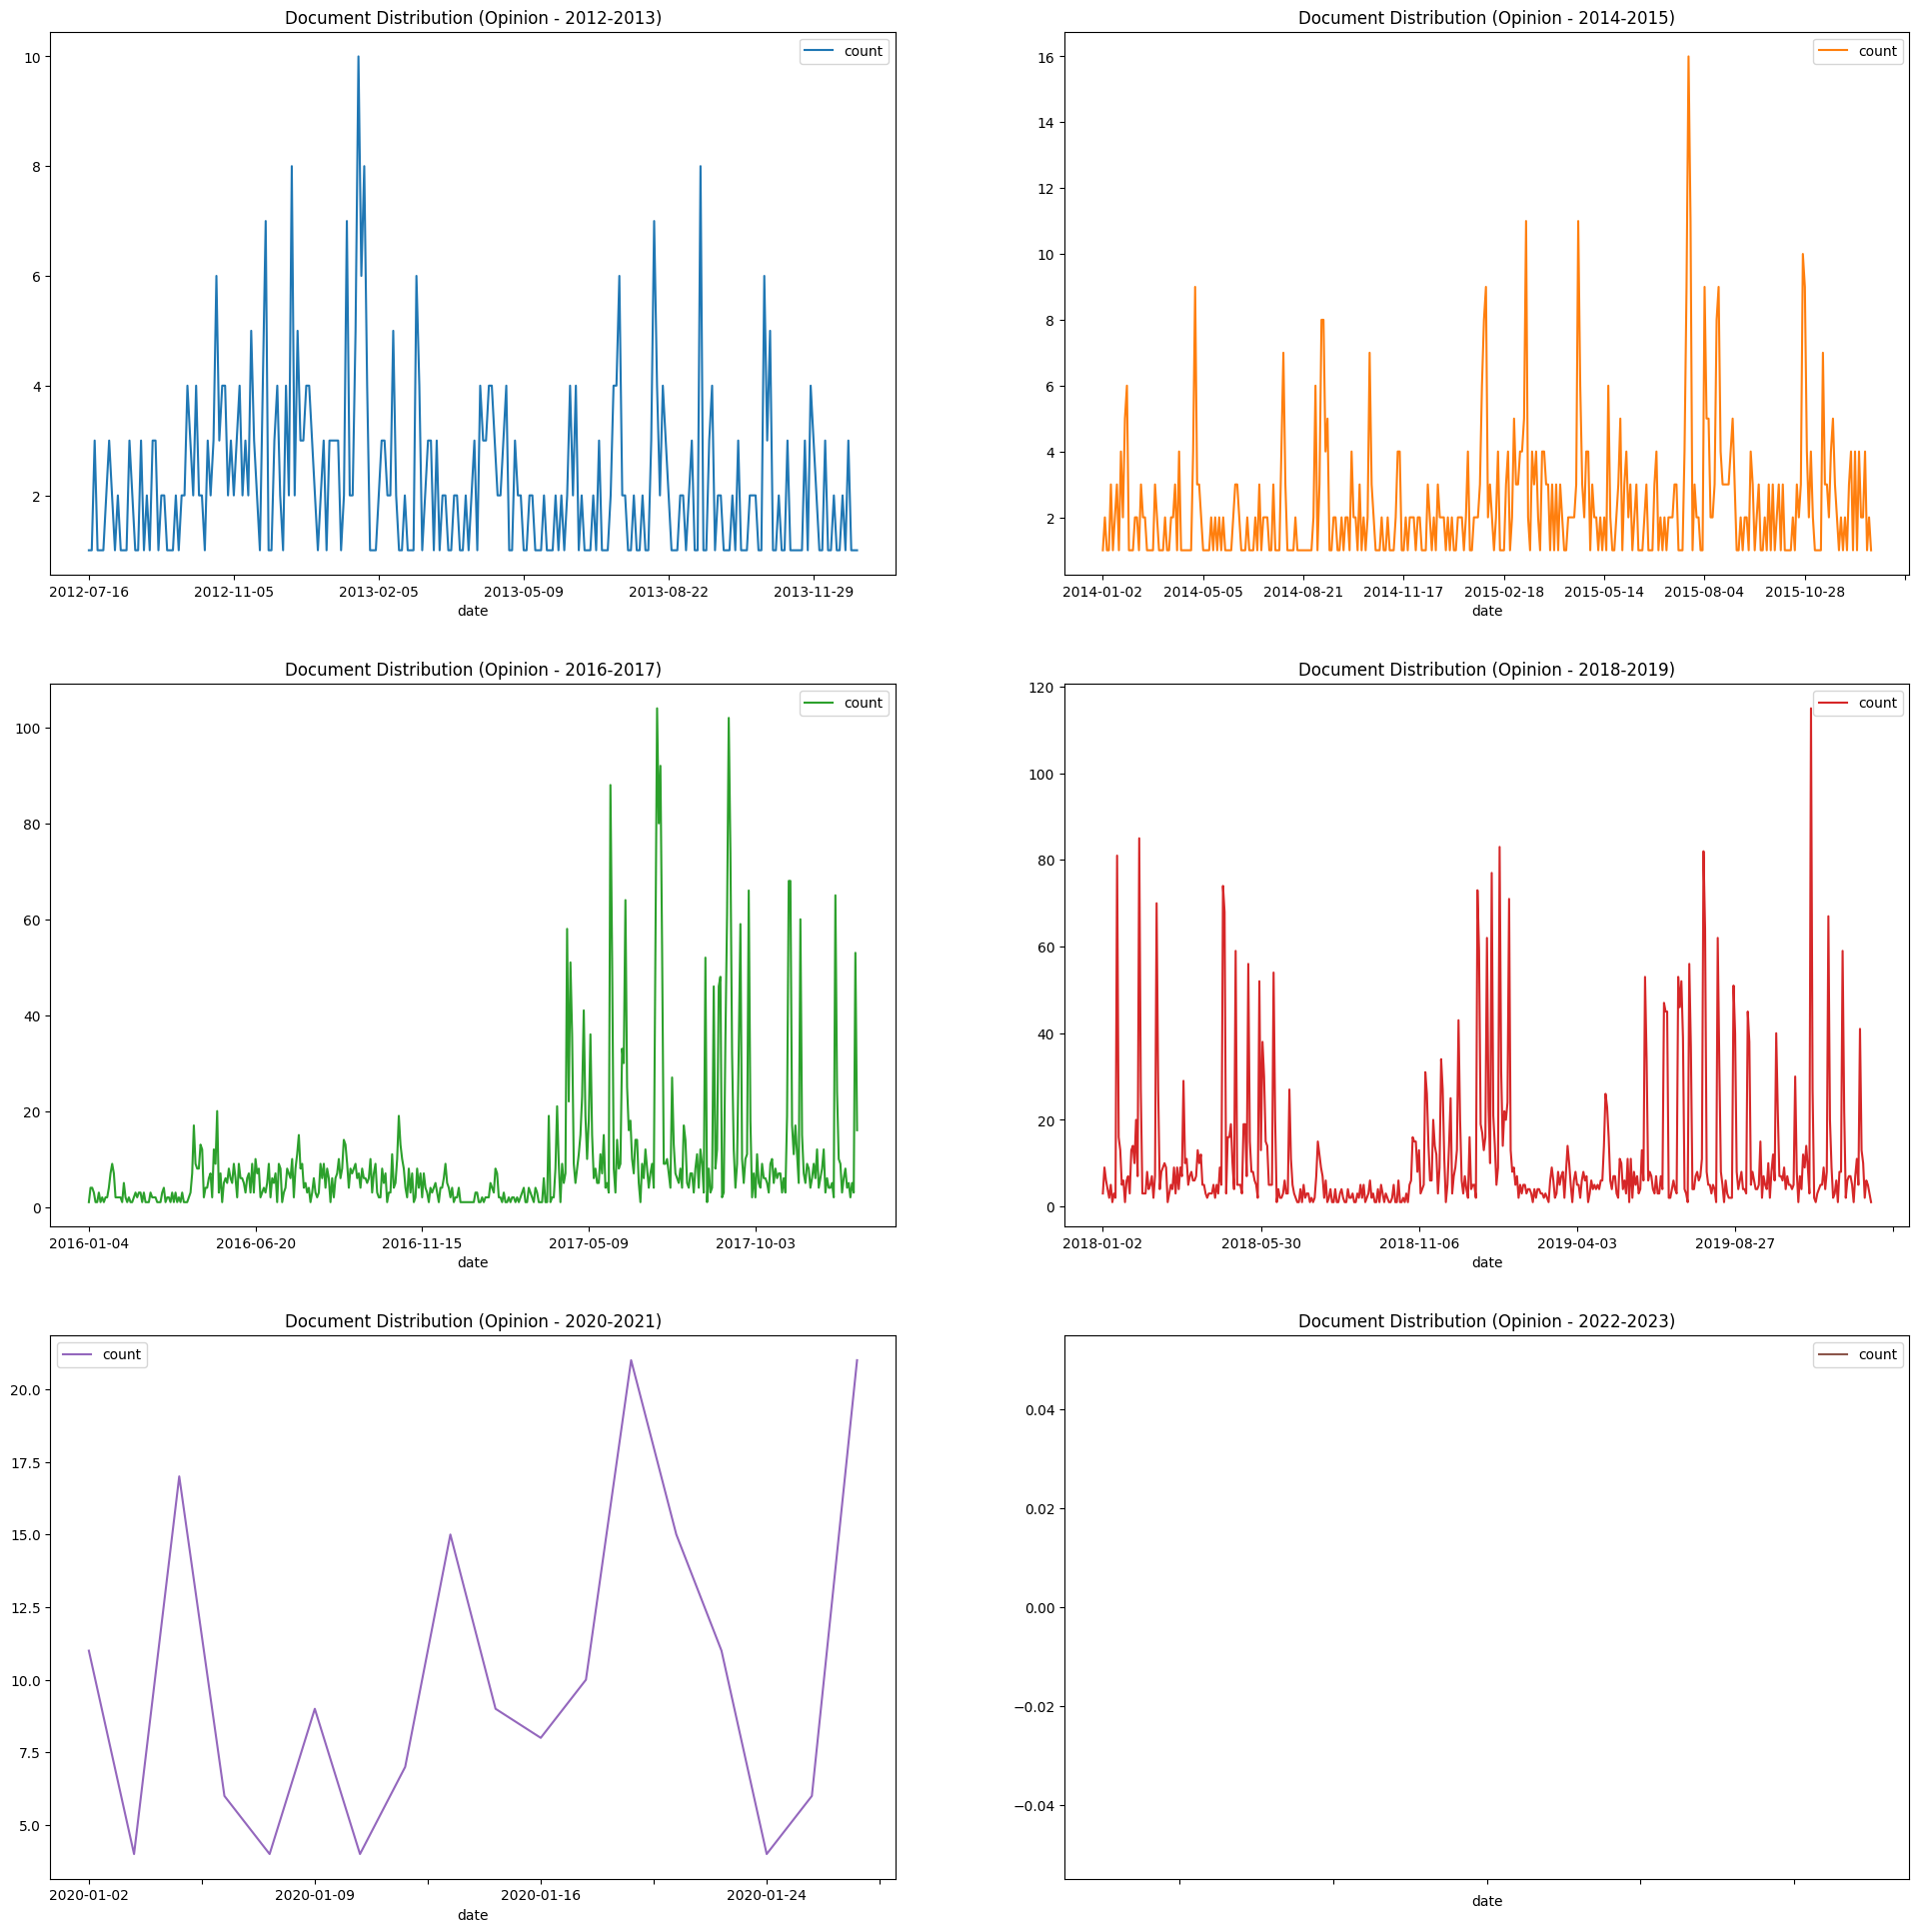

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 24))

_ = opinion_distribution[(opinion_distribution.index >= "2012-01-01") & (opinion_distribution.index <= "2013-12-31")].plot(
    kind="line",
    ax=axes[0, 0],
    color="tab:blue",
    title="Document Distribution (Opinion - 2012-2013)",
)

_ = opinion_distribution[(opinion_distribution.index >= "2014-01-01") & (opinion_distribution.index <= "2015-12-31")].plot(
    kind="line",
    ax=axes[0, 1],
    color="tab:orange",
    title="Document Distribution (Opinion - 2014-2015)",
)

_ = opinion_distribution[(opinion_distribution.index >= "2016-01-01") & (opinion_distribution.index <= "2017-12-31")].plot(
    kind="line",
    ax=axes[1, 0],
    color="tab:green",
    title="Document Distribution (Opinion - 2016-2017)",
)

_ = opinion_distribution[(opinion_distribution.index >= "2018-01-01") & (opinion_distribution.index <= "2019-12-31")].plot(
    kind="line",
    ax=axes[1, 1],
    color="tab:red",
    title="Document Distribution (Opinion - 2018-2019)",
)

_ = opinion_distribution[(opinion_distribution.index >= "2020-01-01") & (opinion_distribution.index <= "2021-12-31")].plot(
    kind="line",
    ax=axes[2, 0],
    color="tab:purple",
    title="Document Distribution (Opinion - 2020-2021)",
)

_ = opinion_distribution[(opinion_distribution.index >= "2022-01-01") & (opinion_distribution.index <= "2023-12-31")].plot(
    kind="line",
    ax=axes[2, 1],
    color="tab:brown",
    title="Document Distribution (Opinion - 2022-2023)",
)

In [21]:
total_words = sum(word_counter.values())
total_unique_words = len(word_counter)
total_unique_documents = len(df_aapl_us_equities_news_subset)
average_words_per_document = total_words / total_unique_documents

print(TEXT_START + "Total Words: " + TEXT_END + str(total_words))
print(TEXT_START + "Total Unique Words: " + TEXT_END + str(total_unique_words))
print(TEXT_START + "Total Documents: " + TEXT_END + str(total_unique_documents))
print(TEXT_START + "Total Unique Documents: " + TEXT_END + str(total_unique_documents))
print(TEXT_START + "Average Words per Document: " + TEXT_END + str(average_words_per_document))

Total Words: 11053361
Total Unique Words: 111983
Total Documents: 17648
Total Unique Documents: 17648
Average Words per Document: 626.3237194016319


# 99. Scratch